In [2]:
import pandas as pd
dataset1=pd.read_csv("datasets/kaggle_cleaned.csv")

In [3]:
dataset1.head(5)

,Unnamed: 0,Unnamed: 0.1,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age in yrs
0,0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973


In [4]:
from sklearn.model_selection import train_test_split
X=dataset1[['gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','age in yrs']]
y=dataset1.cardio

#y[y==0] = 'No CVD'
#y[y==1] = 'CVD patient'

In [6]:
X.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age in yrs
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,53.339358
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,6.759594
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,29.583562
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,48.394521
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,53.980822
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,58.430137
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,64.967123


In [7]:
#delete some outlier values (obviously incorrect) 
print(X.shape)
valid = (X.weight>30) & (X.ap_hi>50) & (X.ap_hi<220) & (X.ap_lo>20) & (X.ap_lo<150)
X = X[valid]
y = y[valid]
print(X.shape)
print(y.shape)

(70000, 11)
(68717, 11)
(68717,)


In [8]:
#one-hot encoding
from sklearn import preprocessing
onehot_ch= preprocessing.label_binarize(X.cholesterol, classes=[1,2,3])
onehot_gluc = preprocessing.label_binarize(X.gluc, classes=[1,2,3])
X[['cholesterol=1','cholesterol=2','cholesterol=3']] = onehot_ch
X = X.drop(columns=['cholesterol'])
X[['gluc=1','gluc=2','gluc=3']] = onehot_gluc
X = X.drop(columns=['gluc'])


In [9]:
X.describe()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age in yrs,cholesterol=1,cholesterol=2,cholesterol=3,gluc=1,gluc=2,gluc=3
count,68717.000000,68717.000000,68717.000000,68717.000000,68717.000000,68717.000000,68717.000000,68717.000000,68717.000000,68717.000000,68717.000000,68717.000000,68717.000000,68717.000000,68717.000000
mean,1.348676,164.362123,74.121666,126.576859,81.329904,0.088028,0.053538,0.803367,53.325633,0.750135,0.135294,0.114571,0.850212,0.073723,0.076066
std,0.476555,8.181006,14.314517,16.628495,9.511627,0.283337,0.225106,0.397455,6.762110,0.432938,0.342040,0.318506,0.356866,0.261321,0.265105
min,1.000000,55.000000,31.000000,60.000000,30.000000,0.000000,0.000000,0.000000,29.583562,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,48.375342,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,53.975342,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,58.419178,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.000000,250.000000,200.000000,215.000000,140.000000,1.000000,1.000000,1.000000,64.967123,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
#normalize and scaling

X.gender = X.gender-1
X[['height','weight', 'ap_hi','ap_lo','age in yrs']] = preprocessing.minmax_scale(X[['height','weight', 'ap_hi','ap_lo','age in yrs']])


In [136]:
X.describe()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age in yrs,cholesterol=1,cholesterol=2,cholesterol=3,gluc=1,gluc=2,gluc=3
count,68746.000000,68746.000000,68746.000000,68746.000000,68746.000000,68746.000000,68746.00000,68746.000000,68746.000000,68746.000000,68746.000000,68746.000000,68746.000000,68746.000000,68746.000000
mean,0.348646,0.560824,0.255147,0.429519,0.577709,0.087991,0.05353,0.803392,0.670965,0.750167,0.135266,0.114567,0.850246,0.073721,0.076034
std,0.476545,0.041993,0.084705,0.107302,0.069139,0.283283,0.22509,0.397436,0.191110,0.432919,0.342010,0.318501,0.356833,0.261318,0.265054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.533333,0.201183,0.387097,0.568345,0.000000,0.00000,1.000000,0.531010,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.564103,0.242604,0.387097,0.568345,0.000000,0.00000,1.000000,0.689276,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.589744,0.301775,0.516129,0.640288,0.000000,0.00000,1.000000,0.814944,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
print(X_train.shape)
logreg = LogisticRegression(class_weight='balanced',max_iter=1000,)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

(54973, 15)


Accuracy : 0.7215512223515715
f1 : 0.703952966658931
recall : 0.6701030927835051


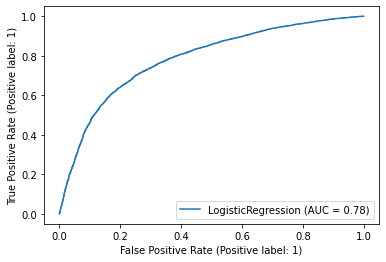

In [149]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
score = f1_score(y_test,y_pred)
print('f1 :',score)
score = recall_score(y_test,y_pred)
print('recall :',score)
plot_roc_curve(logreg,X_test,y_test)

In [12]:
print(y_pred)

[1 1 1 ... 0 1 0]


## MLP

In [139]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(32,64,128),alpha=0.001,random_state=1,solver='adam', max_iter=5000).fit(X, y)

Accuracy : 0.7502981991679516
f1 : 0.7335713177091416
recall : 0.6949770615221739


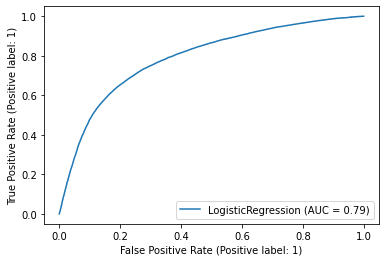

In [141]:
y_pred = clf.predict(X)
score = accuracy_score(y,y_pred)
print('Accuracy :',score)
score = f1_score(y,y_pred)
print('f1 :',score)
score = recall_score(y,y_pred)
print('recall :',score)
plot_roc_curve(logreg,X,y)

## feature selection
 

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [87]:
X_new = SelectKBest(chi2, k=5).fit_transform(X_train, y_train)


In [88]:
logreg = LogisticRegression(class_weight='balanced',max_iter=1000,penalty='l1',solver='liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

Accuracy : 0.7272991639403853
f1 : 0.7059192473539787
recall : 0.6690444345370783


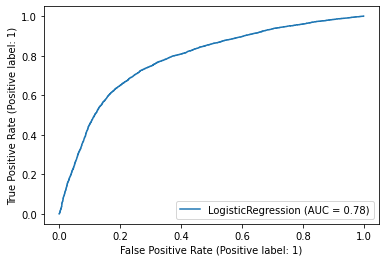

In [90]:
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
score = f1_score(y_test,y_pred)
print('f1 :',score)
score = recall_score(y_test,y_pred)
print('recall :',score)
plot_roc_curve(logreg,X_test,y_test)